# End-Semester Exam

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import lib_for_endsem as lib

## Question 1

### Helper Functions

In [12]:
def mlcg(x):
    num = (572*x)%16381
    return num

def mlcg_theta(N, seed):
    theta = np.zeros(N)
    for i in range(N):
        if i == 0:
            value = mlcg(seed)
        else:
            value = mlcg(value)
        theta[i] = value
    
    theta = (theta/16381)*2*np.pi        
    return theta

def rmwalk_2d(steps, seed):
    theta = mlcg_theta(steps, seed)
    pos = np.zeros((steps,2))
    for i in range(1,steps):
        pos[i,:] = pos[i-1,:] + [np.cos(theta[i]), np.sin(theta[i])]
    return pos

def rm_dist(walk):
    return np.linalg.norm(walk[-1])**2

### Main Code

In [13]:
numwalks = 500
steps = 200
dimensions = 2

#simulate 500 random numwalks of 200 steps in 2 dimensions
m_walk = np.zeros((numwalks, steps, dimensions))
for i in range(numwalks):
    m_walk[i,:,:] = rmwalk_2d(steps, (i+1)/7)
    
ms_all = [rm_dist(j) for j in m_walk]
rms_final = np.sqrt(np.mean(ms_all))
print("Root mean square for 500 numwalks of 200 steps is: ", rms_final)
print("The value of square root N is: ",np.sqrt(steps))

'''Root mean square for 500 numwalks of 200 steps is:  13.905281598259286
The value of square root N is:  14.142135623730951'''

Root mean square for 500 numwalks of 200 steps is:  13.905281598259286
The value of square root N is:  14.142135623730951


'Root mean square for 500 numwalks of 200 steps is:  13.905281598259286\nThe value of square root N is:  14.142135623730951'

## Question 2

### Helper Functions

In [14]:
def legendre_poly(x, order):
    if order == 0: return 1
    elif order == 1: return x
    elif order == 2: return (3*(x**2) - 1) / 2
    elif order == 3: return (5*(x**3) - 3*x) / 2
    elif order == 4: return (35*(x**4) - 30*(x**2) + 3) / 8
    elif order == 5: return (63*(x**5) - 70*(x**3) + 15*x) / 8
    elif order == 6: return (231*(x**6) - 315*(x**4) + 105*(x**2) - 5) / 16





def legendre_fit(X, Y, d = 3):
    n = len(X)
    p = d + 1
    A = np.zeros((p, p))
    b = np.zeros(p)

    for i in range(p):
        for j in range(p):
            sum = 0
            for k in range(n):
                sum += legendre_poly(X[k], j) * legendre_poly(X[k], i)
            A[i, j] = sum

    for i in range(p):
        sum = 0
        for k in range(n):
            sum += legendre_poly(X[k], i) * Y[k]
        b[i] = sum

    x = lib.solvex_lu(A, b)
    return x

### Main Code

The coefficients obtained in the legendre functions basis is : [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456]


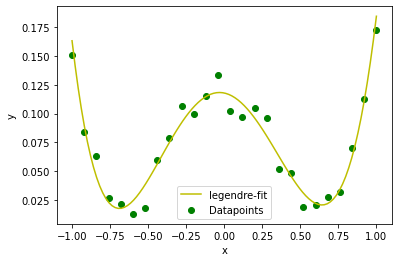

'The coefficients obtained in the legendre functions basis is : [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697\n -0.01238456]'

In [15]:
f = open('esem4fit.txt', 'r')
data = np.genfromtxt(f, delimiter='')
f.close()

X = data.T[0]
Y = data.T[1]

order = 6

coeff = legendre_fit(X, Y, order)

c_0, c_1, c_2, c_3 = coeff[0], coeff[1], coeff[2], coeff[3]

print("The coefficients obtained in the legendre functions basis is : {}".format(coeff))

x = np.linspace(-1, 1, 100)
y = 0
for i in range(order):
    y += coeff[i] * legendre_poly(x , i)

plt.scatter(X, Y, c = 'g', label="Datapoints")
plt.plot(x, y, "y", label="legendre-fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('legendre_fit_deg'+str(order)+'.png')
plt.show()

'''The coefficients obtained in the legendre functions basis is : [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456]'''


##### The order of the polynomial which appropriately fits the data is 6

## Question 3

### Main Code

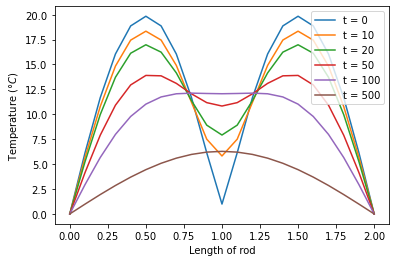

'At time t = 0 the temperature profile follows a mod sine curve as given by the initial conditions. It has maximas at x = 0.5 and x = 1.5\n   For simplicity we assume that the temperature at the end points does not change for all times. At t = 0 the point x =1 has tempereature 0 \n   Since this is a diffusion equation, as time increases, the temperature gradient diffuses and the temperature at the node at x = 1 rises and\n   hence the temperature ta the maximas(antinodes) decreases '

In [16]:
nx = 19
dx = 0.1
dt = 0.0008
a = dt/(dx**2)

state_t0 = np.zeros((nx))
for i in range(nx):
    state_t0[i] = 20*abs(np.sin(np.pi*(i+1)*0.1))

A = np.zeros((nx,nx))
for i in range(nx):
    A[i,i] = 1-(2*a)
    if i+1 < nx:
        A[i+1,i] = a
        A[i,i+1] = a

watch = [0,10,20,50,100,500]
for i in range(501):
    if i == 0:
        state = state_t0
    state = A @ state
    
    if i in watch:
        x = np.arange(0, 2.1, dx)
        y = np.zeros((nx + 2))
        y[1:-1] = state
        plt.plot(x,y, label='t = '+str(i))
        
plt.xlabel('Length of rod')
plt.ylabel('Temperature ($\degree C$)')
plt.legend()
plt.savefig('temperature_profile.png')
plt.show()

"""At time t = 0 the temperature profile follows a mod sine curve as given by the initial conditions. It has maximas at x = 0.5 and x = 1.5
   For simplicity we assume that the temperature at the end points does not change for all times. At t = 0 the point x =1 has tempereature 0 
   Since this is a diffusion equation, as time increases, the temperature gradient diffuses and the temperature at the node at x = 1 rises and
   hence the temperature ta the maximas(antinodes) decreases """
    

## Question 4

### Main Code

In [17]:
from lib_for_endsem import gq_integral

def func(x):
	return 1/np.sqrt(x**2 + 1)

for i in range(4,7):

    [integ, err] = gq_integral(func , i, -1,1)
    if err==0:
        print( "The Value of the Potential using "+str(i)+"-point gaussian quadrature is : ", integ)
    else:
        print("Integral evaluation failed")

'''The Value of the Potential using 4-point gaussian quadrature is :  1.7620541801612164
The Value of the Potential using 5-point gaussian quadrature is :  1.7628552952263554
The Value of the Potential using 6-point gaussian quadrature is :  1.7627300504451417'''

'''The value after the 9th decimal place for 4,5 and 6 point gauss quadrature is 8016, 9522 and 5044
   Thus the 4 and 5 point gauss quadrature are closer to each other than the 6 point gauss quadrature'''

The Value of the Potential using 4-point gaussian quadrature is :  1.7620541801612164
The Value of the Potential using 5-point gaussian quadrature is :  1.7628552952263554
The Value of the Potential using 6-point gaussian quadrature is :  1.7627300504451417


'The value after the 9th decimal place for 4,5 and 6 point gauss quadrature is 8016, 9522 and 5044\n   Thus the 4 and 5 point gauss quadrature are closer to each other than the 6 point gauss quadrature'